In [7]:
import plotly.express as px
import pandas as pd

In [13]:
 import plotly.graph_objects as go

categories = [
    "Expert and User Reviews",
    "Ease of Navigation and Search Features",
    "Personalized Recommendations",
    "Brewery Reputation and Origin",
    "Shipping and Storage"
]

young = [5, 4, 4, 3, 4]
medium = [4, 5, 4, 4, 5]
old = [3, 5, 2, 5, 4]

# Creating the radar plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=young,
    theta=categories,
    fill='toself',
    name='20-30'
))

fig.add_trace(go.Scatterpolar(
    r=medium,
    theta=categories,
    fill='toself',
    name='30-40'
))

fig.add_trace(go.Scatterpolar(
    r=old,
    theta=categories,
    fill='toself',
    name='50+'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        )),
    showlegend=True
)

fig.update_layout(
    legend=dict(
        title="Age Groups",
    )
)

fig.show()

In [14]:
survey = pd.read_csv('../data/survey.csv').groupby(['Age Group']).mean().reset_index()

In [17]:
survey = survey.groupby(['Age Group']).mean().reset_index()

In [26]:
def make_radar(survey):
    # Creating the radar plot
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=survey.iloc[0, 1:],
        theta=categories,
        fill='toself',
        name='20-30'
    ))

    fig.add_trace(go.Scatterpolar(
        r=survey.iloc[1, 1:],
        theta=categories,
        fill='toself',
        name='30-40'
    ))

    fig.add_trace(go.Scatterpolar(
        r=survey.iloc[2, 1:],
        theta=categories,
        fill='toself',
        name='50+'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10]
            )),
        showlegend=True
    )

    fig.update_layout(
        legend=dict(
            title="Age Groups",
        )
    )

    fig.show()

In [24]:
make_radar(survey = pd.read_csv('../data/survey.csv').groupby(['Age Group']).mean().reset_index())

In [30]:
make_radar(survey = pd.read_csv('../data/survey_nuanced.csv').groupby(['Age Group']).mean().reset_index())

/var/folders/qm/htpqrf1j3y9_vkckvn_txydm0000gn/T/ipykernel_18579/3423812860.py:10: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

/opt/homebrew/Caskroom/miniforge/base/envs/BeerBrain/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/opt/homebrew/Caskroom/miniforge/base/envs/BeerBrain/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  

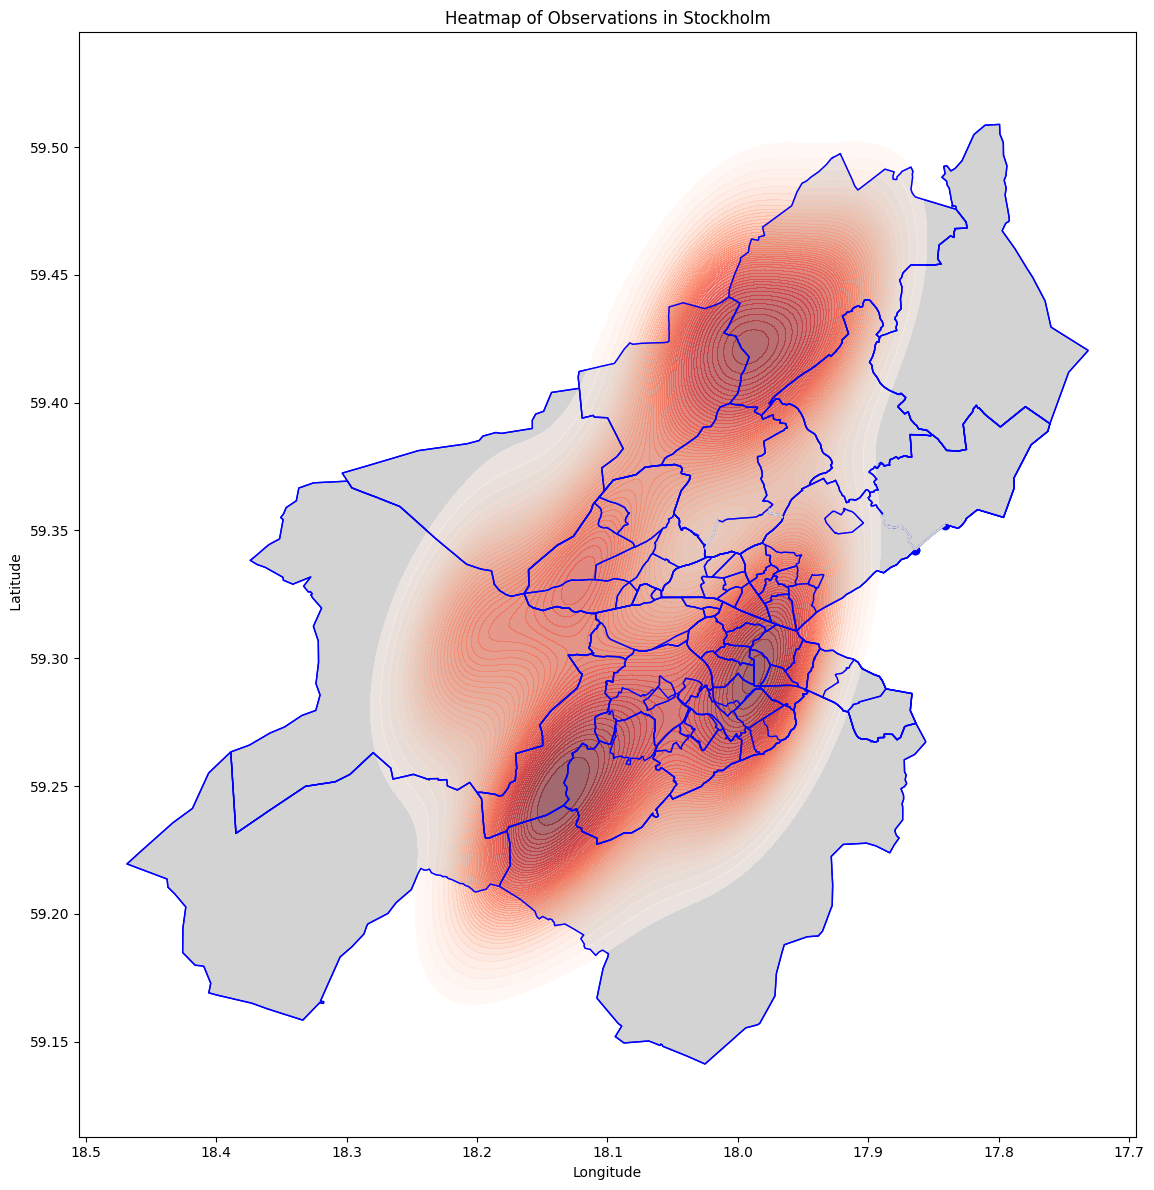

In [67]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Fetch the boundary for Stockholm
boundary = ox.geocode_to_gdf('Stockholm, Sweden')

# Fetch administrative boundaries within the boundary of Stockholm
tags = {"admin_level": "8", "boundary": "administrative"}
gdf_municipalities = ox.geometries_from_polygon(boundary.geometry[0], tags=tags)

# Filter the data to exclude large areas (which might represent the broader region or entire Sweden)
# This is a heuristic method where we're removing larger areas to focus on Stockholm. 
# The value might need to be adjusted based on the data you get.
max_area = 0.05
gdf_municipalities = gdf_municipalities[gdf_municipalities.geometry.area < max_area]

# Load the CSV into a DataFrame
df = pd.read_csv('../data/sweden.csv')
df = df[['Longitude', ' Latitude']]

# Use seaborn to create a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
gdf_municipalities.boundary.plot(ax=ax, color='blue', linewidth=1)
gdf_municipalities.plot(ax=ax, color='lightgray', edgecolor='blue')

# Creating the heatmap
sns.kdeplot(x=df['Longitude'], y=df[' Latitude'], cmap="Reds", shade=True, ax=ax, levels=50, alpha=0.5)

ax.invert_xaxis()
plt.title("Heatmap of Observations in Stockholm")
plt.tight_layout()
plt.show()

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# Fetch the boundary for Stockholm
boundary = ox.geocode_to_gdf('Stockholm, Sweden')

# Plot the boundary of Stockholm
fig, ax = plt.subplots(figsize=(12, 12))
boundary.boundary.plot(ax=ax, color='blue', linewidth=1)
boundary.plot(ax=ax, color='lightgray', edgecolor='blue')

# Invert the x-axis to mirror the plot
ax.invert_xaxis()

plt.title("Mirrored Stockholm")
plt.tight_layout()
plt.show()
